1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

--2023-12-08 17:34:18--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2023-12-08 17:34:19--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccfcdb36a46e1a76afdf5cd14bd.dl.dropboxusercontent.com/cd/0/inline/CJDLSXf4oUb53hlQwcZlm8Q-GShBxuH_mOxDTd8uRqa0FsiRltovCr_hj-oQ-fWvGfSfDnm-zjzyCB3-HcjgHGpFAhFJyhSiA7fLDeTwwByk4V6QxWRSfHlZo66YkrJnyn4/file# [following]
--2023-12-08 17:34:20--  https://uccfcdb36a46e1a76afdf5cd14bd.dl.dropboxusercontent.com/cd/0/inline/CJDLSXf4oUb53hlQwcZlm8Q-GShBxuH_mOxDTd8uRqa0FsiRltovCr_hj-oQ-fWvGfSfDnm-zjzyCB3-Hcjg

Text(0, 0.5, '$feature3$')

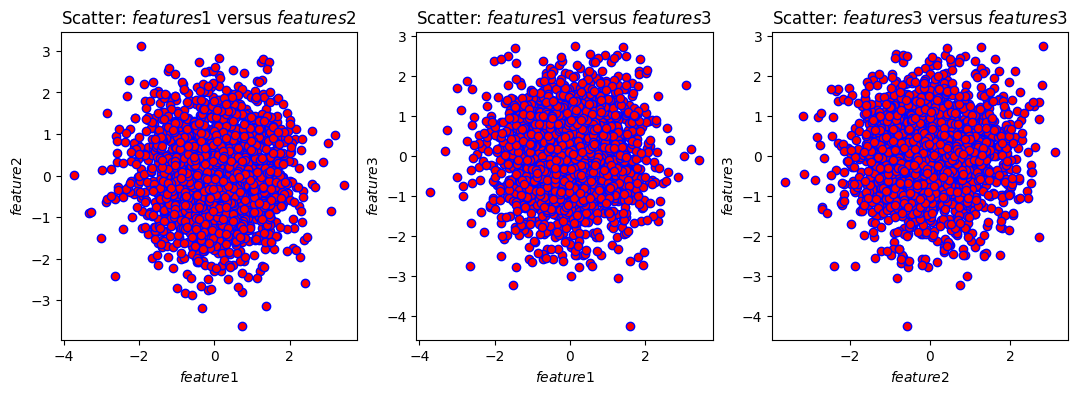

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
data = pd.read_csv('data/regression_generated.csv')

# create one figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
# unpack ax1 and ax2 inline

ax1.scatter(x=data["features_1"], y=data["features_2"], marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $features1$ versus $features2$')
ax1.set_xlabel('$feature1$')
ax1.set_ylabel('$feature2$')

ax2.scatter(x=data["features_1"], y=data["features_3"], marker='o', c='r', edgecolor='b')
ax2.set_title('Scatter: $features1$ versus $features3$')
ax2.set_xlabel('$feature1$')
ax2.set_ylabel('$feature3$')

ax3.scatter(x=data["features_2"], y=data["features_3"], marker='o', c='r', edgecolor='b')
ax3.set_title('Scatter: $features3$ versus $features3$')
ax3.set_xlabel('$feature2$')
ax3.set_ylabel('$feature3$')

#Comment about the features correlation: there are no evident pattern on all the scatter plots so it can be said that there are no particular
#correlations among the considered features.
#If there would be correlations, we could observe an upward or downward slope distribution of the points in each plot.
#In general, to detect correlation a more accurate method is to plot the correlation matrix with the correlation coefficients. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

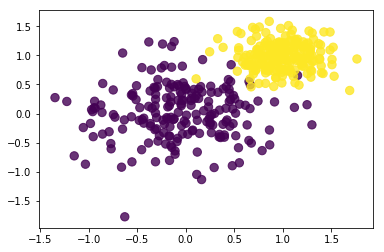

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

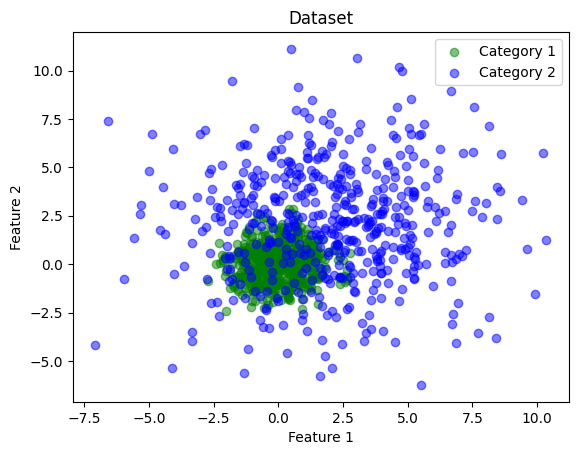

In [3]:
N = 500
mean1 = 0
std1 = 1
x1 = np.random.normal(mean1, std1, (N,2))

mean2 = 2
std2 = 3
x2 = np.random.normal(mean2, std2, (N,2))

labels1 = np.zeros(N)
labels2 = np.ones(N)

X = np.concatenate([x1, x2])
Y = np.concatenate([labels1, labels2])

plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], label='Category 1', alpha=0.5, color = 'green')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label='Category 2', alpha=0.5, color = 'blue')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
#DISCLAIMER: only for this exercise, to re-execute the code in the correct way you also have to restart the kernel

!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename = 'data/residuals_261.pkl'
  
data = pd.read_pickle(filename)
df = pd.DataFrame(data.tolist())
print("Elements in the dataset before processing:",len(df))
mask1=df['residuals']<2
mask2=df['residuals']>-2
filtered_data = df[mask1&mask2]
df = pd.DataFrame(filtered_data)
df['residuals'] = df['residuals'].astype(np.float32)
print("Elements in the dataset after processing:",len(df))
df

--2023-12-08 17:34:23--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-08 17:34:24--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48a577245bace624c18df96c9f.dl.dropboxusercontent.com/cd/0/inline/CJAItLTqZ39P-m3_gAJt5Q7fJRU0hTNrhzJeNgrS7PJjmUxo9ZdJzSvEy8r4osS3I99GrvEQYg-L76sGRvpNOCeFU5GqY8ZjXyNZXeHMexEy65iIA2dOa91RIdxbRYS7oTA/file# [following]
--2023-12-08 17:34:25--  https://uc48a577245bace624c18df96c9f.dl.dropboxusercontent.com/cd/0/inline/CJAItLTqZ39P-m3_gAJt5Q7fJRU0hTNrhzJeNgrS7PJjmUxo9ZdJzSvEy8r4osS3I99GrvEQYg-L76sGRvpNOCeFU5GqY8ZjXyNZXeHMe

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


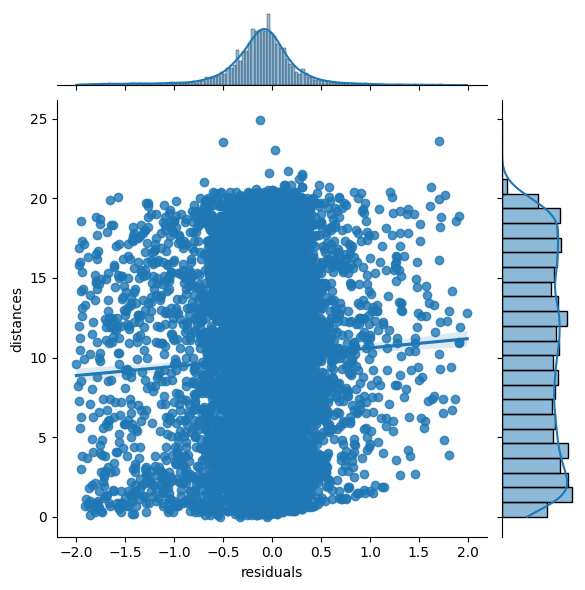

In [5]:
sns.jointplot(x="residuals", y="distances", data=df, kind="reg")

Histogram content: [326. 593. 533. 513. 433. 455. 462. 416. 410. 376. 447. 454. 433. 460.
 449. 483. 369. 446. 478. 417. 460. 437. 460. 161.  11.   3.   1.   2.
   1.]
Bin boundaries: [ 0.          0.85862069  1.71724138  2.57586207  3.43448276  4.29310345
  5.15172414  6.01034483  6.86896552  7.72758621  8.5862069   9.44482759
 10.30344828 11.16206897 12.02068966 12.87931034 13.73793103 14.59655172
 15.45517241 16.3137931  17.17241379 18.03103448 18.88965517 19.74827586
 20.60689655 21.46551724 22.32413793 23.18275862 24.04137931 24.9       ]


Text(0, 0.5, 'number of occurrences')

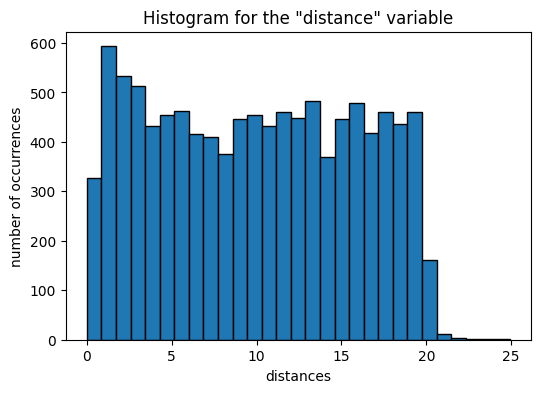

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
h, bins, _ = plt.hist(df['distances'], bins=29, ec='black') # create and plot the histogram
ax = fig.axes[0]
ax.set_title('Histogram for the "distance" variable')
print("Histogram content:", h)
print("Bin boundaries:", bins)
plt.xlabel("distances")
plt.ylabel("number of occurrences")

In [7]:
#x
x = [(bins[i+1] + bins[i])/2 for i in range(29)]
print("x =",x)
#y
y = [(np.mean(df[(bins[i]<=df["distances"]) & (df["distances"]< bins[i+1])]["residuals"].to_numpy())) for i in range(29)]
print("y =",y)
#err_y
err_y = [(np.std(df[(bins[i]<=df["distances"])&(df["distances"]<bins[i+1])]["residuals"].to_numpy())) for i in range(29)]
print("err_y =",err_y)

x = [0.4293103448275858, 1.2879310344827575, 2.146551724137929, 3.0051724137931006, 3.863793103448272, 4.722413793103444, 5.581034482758616, 6.4396551724137865, 7.298275862068959, 8.15689655172413, 9.015517241379301, 9.874137931034474, 10.732758620689644, 11.591379310344816, 12.449999999999989, 13.308620689655159, 14.167241379310331, 15.025862068965502, 15.884482758620674, 16.743103448275846, 17.601724137931015, 18.46034482758619, 19.31896551724136, 20.177586206896535, 21.036206896551704, 21.894827586206873, 22.75344827586205, 23.612068965517217, 24.470689655172393]
y = [-0.22713348, -0.16226405, -0.17317896, -0.16271122, -0.12862091, -0.14262302, -0.13540961, -0.11162753, -0.07093147, -0.11007106, -0.07470246, -0.09323589, -0.054961618, -0.092634685, -0.08241882, -0.116112195, -0.13606647, -0.18106192, -0.09817005, -0.1506814, -0.16360506, -0.12166875, -0.062083747, -0.028014194, 0.3290909, 0.14222223, 0.028571429, 0.605, nan]
err_y = [0.46487224, 0.45481104, 0.40543628, 0.4084228, 0.

/home/elisa/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elisa/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/elisa/.local/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/elisa/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/elisa/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


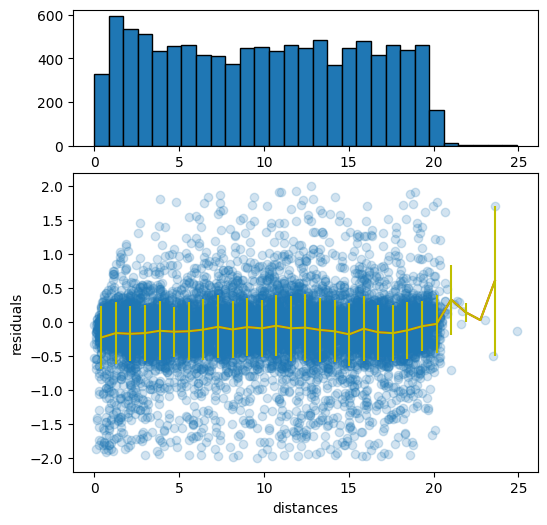

In [8]:
gridsize = (3, 1)
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid(gridsize, (0,0),rowspan=1)
h, bins, _ = ax1.hist(df["distances"], bins=29,ec='black')
ax2 = plt.subplot2grid(gridsize, (1, 0),rowspan=2)
scatter = ax2.scatter(x=df['distances'], y=df['residuals'], alpha=0.2)
ax2.set_xlabel('distances')
ax2.set_ylabel('residuals')
ax2.plot(x,y, color = "red")
ax2.errorbar(x,y, yerr=err_y, fmt='y-', label='Profile Plot')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


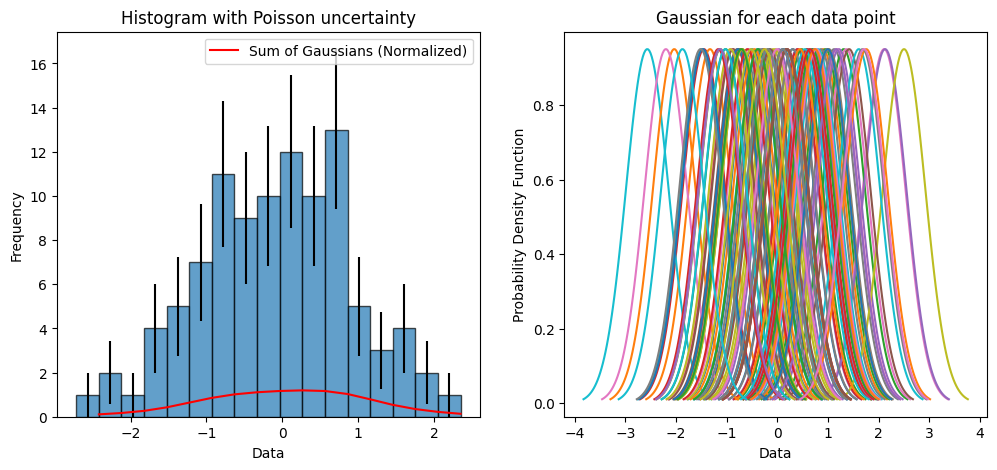

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

N = 100
mean = 0
std = 1
x = np.random.normal(mean, std, size=N)
bins = np.linspace(min(x), max(x), 18)  # Choose a meaningful number of bins

#first plot
hist, bin_edges = np.histogram(x, bins, density=False)
errors = np.sqrt(hist)

std_dev_factor = 1.06 * N**(-1/5)
default_std_dev = std_dev_factor * x.std()
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

gaussians = [stats.norm(loc=val, scale=default_std_dev) for val in x]
sum_gaussians = np.sum([gaussian.pdf(bin_centers) for gaussian in gaussians], axis=0)

# Normalize the sum to match the integral of the original histogram
normalized_sum = sum_gaussians / integrate.trapz(hist, bin_centers)



fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(bin_edges[:-1], hist, width=np.diff(bin_edges), yerr=errors, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Data')
ax[0].plot(bin_centers, normalized_sum, color='red', label='Sum of Gaussians (Normalized)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram with Poisson uncertainty')
ax[0].legend()


#second plot
for val, gaussian in zip(x, gaussians):
    x_vals = np.linspace(val - 3*default_std_dev, val + 3*default_std_dev, 100)
    y_vals = gaussian.pdf(x_vals)
    ax[1].plot(x_vals, y_vals, label=f'Mean = {val:.2f}')


ax[1].set_xlabel('Data')
ax[1].set_ylabel('Probability Density Function')
ax[1].set_title('Gaussian for each data point')

#final plot
plt.show()